# Elektroninių Pinigų Įstaigų pajamų ir sąnaudų rodiklių skaičiavimo metodika
2023-04-26

Rokas Klydžia,
Marius Gurinas

## Turinys
### Įvadas
### 1. Duomenys
#### 1.1. Elektroninių Piningų Įstaigų tęstinės apklausos duomenys (2019Q1 - 2022Q4)
#### 1.2. Pelno (Nuostolio) ataskaitų duomenys
##### 1.2.1. EM008_03 lentelės duomenys
#### 1.3. AML (Pinigų plovimo prevencijos) ataskaitų duomenys
##### 1.3.1. EM0010_02 lentelės duomenys (Klientų ir jų mokėjimo paslaugų ataskaita)
### 2. Skaičiavimai
#### 2.1. Kreditas (Eksportas)
#### 2.2. Debetas (Importas)
### 3. Metodologinės pastabos

# Įvadas
Šis dokumentas sukurtas kaip R kodo, skirto apskaičiuoti Elektroninių Pinigų Įstaigų (EPĮ) pajamų ir sąnaudų, susijusių su nerezidentais rodikliams, bei su skaičiavimais susijusios metodologijos dokumentacija.

# 1. Duomenys
## 1.1. EPĮ tęstinės apklausos (tyrimo) duomenys (2019Q1 - 2022Q4)
Lietuvos banko iniciatyva buvo renkami duomenys apie Elektroninių Pinigų Įstaigų ir Mokėjimo Įstaigų pajamas bei sąnaudas, susijusias su finansinėmis paslaugomis ir komisiniais mokesčiais. Tyrime dalyvavo 50 atrinktų FinTech (EPĮ/MĮ) įmonių.

Dažnis: Ketvirtiniai

Imtis: 50 įmonių

Duomenų objektai:
1. **Kreditas** išskaidytas pagal šalis
2. **Debetas** išskaidytas pagal šalis

Ekonomine ir statistine prasme, kreditas čia reiškia *paslaugų ir komisinių pajamas* (eksportą), o debetas čia reiškia *paslaugų ir komisinių sąnaudas* (importą).

Šio projekto kontekste naudosime *30* iš minėtų 50 įmonių duomenis, kadangi dalis jų nebevykdo veiklos, arba persikvalifikavo (pvz. Revolut Payments gavo banko licenciją).

EPĮ tyrimas baigtas 2023-04, tad šie duomenys yra neberenkami.

Šio tyrimo duomenis naudosime debeto pusės rezidentiškumo indeksui išskaičiuoti, tad įsikelkime duomenis:

In [90]:
## EPĮ tyrimo duomenys

# Pilnas EPĮ/MĮ apklausos suminis duomenų rinkinys pagal šalis (50 įmonių)
#df_credit <- readxl::read_excel("data\\df_credit.xlsx")
#df_debit <- readxl::read_excel("data\\df_debit.xlsx", row.names(2))

# Be Revolut ir kitų nebeveikiančių Fintech įmonių (30 įmonių)
#df_credit_og <- readxl::read_excel("data\\df_credit_v2.xlsx")
#df_debit_og <- readxl::read_excel("data\\df_debit_v2.xlsx", row.names(2))

# Be Revolut ir kitų nebeveikiančių Fintech įmonių (taip pat, atmetus įvairias EPĮ/MĮ, kurios tik formaliai atitinka šį kriterijų, tačiau ne pagal veiklos modelį (pvz. Kėdainių būstas ir panašūs)
# 26 įmonių duomenys
#df_credit_og <- readxl::read_excel("data\\df_credit_v4.xlsx")
#df_debit_og <- readxl::read_excel("data\\df_debit_v4.xlsx")

# Be Revolut ir kitų nebeveikiančių Fintech įmonių, bei atmetus įvairias mokėjimus priimančias ne fintech agentūras (Pvz Kėdainių būstas, kt) (36 įmonės)
df_credit_og <- readxl::read_excel("data\\df_credit_v5.xlsx")
df_debit_og <- readxl::read_excel("data\\df_debit_v5.xlsx")

library(tidyverse)

### Clean and transform data

df_credit_og$...1 <- NULL
df_debit_og$...1 <- NULL
df_credit$vardas <- NULL # Pašaliname pilnus šalių pavadinimus
df_debit$vardas <- NULL
#df_credit_og$ŠALIS <- NULL
#df_debit_og$ŠALIS <- NULL

df_credit <- as.data.frame(df_credit_og)
df_debit <- as.data.frame(df_debit_og)

df_credit
df_debit
rownames(df_credit) <- df_credit[,1]
rownames(df_debit) <- df_debit[,1]
df_credit <- df_credit[,-1]
df_debit <- df_debit[,-1]

# Transpose
df_credit <- t(df_credit)
df_debit <- t(df_debit)

df_credit <- as.data.frame(df_credit)
df_debit <- as.data.frame(df_debit)

New names:
• `` -> `...1`
New names:
• `` -> `...1`


vardas,ŠALIS,20191,20192,20193,20194,20201,20202,20203,20204,20212,20213,20214,20221,20222,20223,20224
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Andora,AD,0.0000000,0.002140,0.037310,0.0154000,0.000000,0.000000,0.027010,0.04250,0.02416,0.03147,1.03197,1.041910,3.0000,2.0000,2.01639
Jungtiniai Arabų Emyratai,AE,40.1216400,55.764200,49.169700,44.6380400,50.677580,48.860020,63.201200,43.29932,61.29365,89.22711,110.15601,87.345280,135.0000,155.0000,98.21500
Afganistanas,AF,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,4.0000,5.0000,0.00000
Antigva ir Barbuda,AG,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0.00000,0.00000,14.38969,24.68481,22.743370,36.0000,37.0000,29.00000
Angilija,AI,0.0867900,0.137460,0.112290,0.0777900,1.016940,1.025720,1.025420,1.09484,1.05525,1.08291,1.00000,1.002440,1.0000,1.0000,1.00000
Albanija,AL,1.0111900,0.159580,0.018960,0.0276200,0.428780,2.574490,1.232030,1.09127,0.67361,2.69733,46.57532,1.999070,3.0200,8.0500,17.92000
Armėnija,AM,0.0010200,0.018660,0.015270,0.0309700,0.072160,0.300930,0.243130,0.38356,2.52600,1.47191,2.00000,2.762450,4.0000,2.0000,5.76000
Nyderlandų Antilai,AN,1.0000000,6.000000,4.000000,13.0000000,5.000000,0.000000,7.000000,0.00000,0.00500,0.02646,0.00000,0.000000,0.0000,29.0000,0.00000
Angola,AO,0.0211100,0.001530,0.000000,0.0000000,0.000000,0.000000,0.000000,0.00012,0.01367,0.00014,2.41862,0.488390,0.0000,0.0000,0.00000


vardas,ŠALIS,20191,20192,20193,20194,20201,20202,20203,20204,20211,20212,20213,20214,20221,20222,20223,20224
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Andora,AD,0.0002100,0.0002100,0.00104000,0.00051000,0.0003000,0.0005400,0.005360,0.01358541,0.007609553,0.013503447,0.005332130,0.00000000,0.009734801,0.0000,0.00000,0.01639
Jungtiniai Arabų Emyratai,AE,58.0704200,31.1887700,59.10550000,33.01891000,56.0408800,36.1082600,59.228220,40.12999000,57.259400000,71.314161898,69.274093591,66.07415366,91.307794801,70.0000,80.00000,94.07470
Afganistanas,AF,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.000000,0.00000000,0.000000000,0.000000000,0.000000000,0.00000000,0.000000000,7.0000,1.00000,0.00000
Angilija,AI,0.0041100,0.0061600,0.00406000,0.00293000,0.0016800,0.0027100,0.003890,0.00346000,0.001750000,0.001970000,0.003640000,0.00000000,0.002510000,0.0000,0.00000,0.00000
Albanija,AL,0.0172800,0.0079700,0.00406000,0.00722000,0.0168900,0.0747800,0.046010,0.05940000,0.041890000,0.070640000,0.076680000,0.00000000,0.271564801,1.0000,2.00000,3.71000
Armėnija,AM,0.0002000,0.0007400,0.00059000,0.00110000,0.0039000,0.0315600,0.040010,0.06587000,0.093350000,0.088230000,0.075400000,0.00000000,0.132860000,0.0000,0.00579,0.00000
Nyderlandų Antilai,AN,0.0000000,0.0000000,0.00000000,0.00000000,0.0000000,0.0000000,0.000000,0.00000000,0.280133462,0.001373626,0.012987969,0.00000000,0.000000000,0.0000,13.14417,0.00000
Angola,AO,0.0011200,0.0001100,0.00021000,0.00006000,0.0001600,0.0001200,0.000030,0.00016000,0.000320000,0.001870000,0.000590000,0.00000000,0.010044801,0.0000,0.00000,0.00000
Argentina,AR,0.0003200,0.0021600,0.01389000,0.00596000,0.0051200,0.0027300,0.012710,0.00669000,0.006430000,0.018770000,0.016984260,0.00727853,0.049434402,0.0000,0.00000,0.00000


In [91]:
head(df_debit)

,Andora,Jungtiniai Arabų Emyratai,Afganistanas,Angilija,Albanija,Armėnija,Nyderlandų Antilai,Angola,Argentina,Amerikos Samoa,⋯,Venesuela,Mergelių Salos (Didžioji Britanija),Vietnamas,Vanuatu,Samoa,Kosovas,Jemenas,PAR,Zambija,Zimbabvė
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ŠALIS,AD,AE,AF,AI,AL,AM,AN,AO,AR,AS,⋯,VE,VG,VN,VU,WS,XK,YE,ZA,ZM,ZW
20191,0.000210000,58.070420000,0.000000000,0.004110000,0.017280000,0.000200000,0.000000000,0.001120000,0.000320000,0.000000000,⋯,0.347660000,0.000030000,0.111810000,0.000000000,0.000010000,0.000840000,0.000030000,0.002010000,0.000000000,0.000020000
20192,0.00021000,31.18877000,0.00000000,0.00616000,0.00797000,0.00074000,0.00000000,0.00011000,0.00216000,0.00000000,⋯,0.18227000,1.00004000,0.11577000,0.00000000,0.00000000,0.00032000,0.00000000,0.00010000,0.00009000,0.00000000
20193,0.00104000,59.10550000,0.00000000,0.00406000,0.00406000,0.00059000,0.00000000,0.00021000,0.01389000,0.00002000,⋯,0.10031000,0.00002000,0.13252000,1.00000000,0.00000000,0.00956000,0.00000000,0.00046000,0.00052000,0.00002000
20194,0.00051000,33.01891000,0.00000000,0.00293000,0.00722000,0.00110000,0.00000000,0.00006000,0.00596000,0.00002000,⋯,0.13753000,0.00000000,0.20236000,0.00000000,0.00000000,0.00917000,0.00000000,0.00116000,0.00066000,0.00000000
20201,0.00030000,56.04088000,0.00000000,0.00168000,0.01689000,0.00390000,0.00000000,0.00016000,0.00512000,0.00002000,⋯,0.13384000,0.00000000,0.17432000,0.00000000,0.00000000,0.00027000,0.00000000,0.00458000,0.00058000,0.00001000


## 1.2. Pelno (Nuostolio) ataskaitų duomenys
Skaičiavimams naudojame Pelno (Nuostolio) ataskaitoje esančius pajamų ir sąnaudų rodiklių duomenis. Šie duomenys imami tiesiai iš **EM008_03** lentelės.
### 1.2.1. EM008_03 lentelės duomenys
Lietuvos banko renkami EMĮ/MĮ finansinės atskaitomybės ataskaitų duomenys. Skaičiuodami kredito ir debeto įverčius atskiroms šalims kaip pagrindą panaudosime **EM008_03** lentelėje esančius pajamų ir sąnaudų duomenis: 

Duomenų objektai:

**Kreditas** - 7 eilutė 
1.2. Paslaugų ir komisinių pajamos



**Debetas** - 15 eilutė
5.2. Paslaugų ir komisinių sąnaudos



Dažnis: Ketvirtiniai

Imtis: 118 įmonių (mažiau po peržiūros) - **MG**

Priešingai nei EPĮ tyrimo duomenys, šie duomenys neturi šalies atributo, tad tam, kad išskaičiuotume pasiskirstymą pašaliuj, turime panaudoti AML (Pinigų plovimo prevencijos) duomenis, bei **EM0010_02** lentelėje esantį šalių pasiskirstymą.

Įsikelkime duomenis:

In [92]:
# EM008_03 duomenys
database_dt <- data.table::fread("data/EPI_PAJ_SAN.csv", sep = ",")
database_dt <- data.table::fread("data/EM008_03_PAJ_SAN.csv", sep = ",") # 2023-05-24 po duomenų atnaujinimo
database_dt <- data.table::fread("data/EM008_03_PAJ_SAN_2023-06-07.csv", sep = ",") # 2023-06-07 po duomenų atnaujinimo, įskaitant 2023Q1, su vėluojančių įmonių duomenimis
database_dt <- data.table::fread("data/EM008_03_PAJ_SAN_2023-08-11.csv", sep = ",") # 2023-08-11 (Nuo 2019Q1 iki 2023Q2)

# 2023Q3 Linos S. traukti duomenys
#database_dt <- readxl::read_excel("data/EM08_03_20231213.xlsx") # 2023-12-13
#database_dt <- data.table::fread("data/EM08_03_20231213.csv", sep = ",") # 2023-12-13
#database_dt <- data.table::fread("data/EM08_03_20231213_clean.csv", sep = ";") # 2023-12-13
database_dt <- data.table::fread("data/EM08_03_20231214_clean.csv", sep = ";") # 2023-12-14

#database_dt <- database_dt |> dplyr::select(GROUP_ID, DATASET_ID, RA_ID, REP_DATE, STATE, LABEL, RA_CODE, BSI_VALUE, NAME, BSI_ID, BSI_CODE)
#database_dt <- database_dt |> dplyr::filter(BSI_CODE %in% c("I_II_PSLG_KOMIS_PAJ", "V_II_PSLG_KOMIS_SAN"))

# Nuskaitome EM008_03 duomenis, skirtus debeto pusės rezidentiškumo indeksui apskaičiuoti (2022Q4, 36 įmonių duomenys)
database_dt_debit <- data.table::fread("data/EM008_03_PAJ_SAN_2023-08-22_36imones.csv", sep = ",") # 2023-08-22
#database_dt_debit <- database_dt |> dplyr::filter()

head(database_dt)
tail(database_dt)

GROUP_ID,DATASET_ID,RA_ID,REP_DATE,STATE,LABEL,RA_CODE,BSI_VALUE,NAME,BSI_ID,BSI_CODE
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>
EM01,EM008_03,120547943,12/31/2021,B,Patvirtinta,304907425,0,FlorioFinance UAB,96236076,III_TOTAL_PAJ_FIN_PSL
EM01,EM008_03,120547943,12/31/2021,B,Patvirtinta,304907425,0,FlorioFinance UAB,96236080,I_EPL_MPT_PAJ
EM01,EM008_03,120547943,12/31/2021,B,Patvirtinta,304907425,0,FlorioFinance UAB,96236087,I_I_PAL_PAJ
EM01,EM008_03,120547943,12/31/2021,B,Patvirtinta,304907425,0,FlorioFinance UAB,96236088,TOTAL_PAJ
EM01,EM008_03,120547943,12/31/2021,B,Patvirtinta,304907425,245,FlorioFinance UAB,96236089,TOTAL_SAN
EM01,EM008_03,120547943,12/31/2021,B,Patvirtinta,304907425,245,FlorioFinance UAB,96236092,VI_BNDR_ADMIN_SAN


GROUP_ID,DATASET_ID,RA_ID,REP_DATE,STATE,LABEL,RA_CODE,BSI_VALUE,NAME,BSI_ID,BSI_CODE
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>
EM01,EM008_03,61700467,9/30/2023,B,Patvirtinta,304548794,2075,"UAB """"NIUM EU""""",96236089,TOTAL_SAN
EM01,EM008_03,61700467,9/30/2023,B,Patvirtinta,304548794,1520,"UAB """"NIUM EU""""",96236092,VI_BNDR_ADMIN_SAN
EM01,EM008_03,61700467,9/30/2023,B,Patvirtinta,304548794,555,"UAB """"NIUM EU""""",96236093,V_EPL_FPT_SAN
EM01,EM008_03,61700467,9/30/2023,B,Patvirtinta,304548794,555,"UAB """"NIUM EU""""",96236095,V_II_PSLG_KOMIS_SAN
EM01,EM008_03,61700467,9/30/2023,B,Patvirtinta,304548794,-1545,"UAB """"NIUM EU""""",96236097,XII_GRN_PN
EM01,EM008_03,61700467,9/30/2023,B,Patvirtinta,304548794,-1545,"UAB """"NIUM EU""""",96236099,X_PN_PRIES_APMOK


In [93]:
database_dt <- database_dt |> dplyr::filter(BSI_CODE %in% c("I_II_PSLG_KOMIS_PAJ", "V_II_PSLG_KOMIS_SAN"))
head(database_dt)
tail(database_dt)

Warning message in FUN(X[[i]], ...):
"įvesties eilutė 9 šioje lokalėje neleistina"
Warning message in FUN(X[[i]], ...):
"įvesties eilutė 9 šioje lokalėje neleistina"
Warning message in FUN(X[[i]], ...):
"įvesties eilutė 9 šioje lokalėje neleistina"
Warning message in FUN(X[[i]], ...):
"įvesties eilutė 9 šioje lokalėje neleistina"
Warning message in FUN(X[[i]], ...):
"įvesties eilutė 9 šioje lokalėje neleistina"
Warning message in FUN(X[[i]], ...):
"įvesties eilutė 9 šioje lokalėje neleistina"
ERROR while rich displaying an object: Error in gsub(chr, html_specials[[chr]], text, fixed = TRUE): įvesties eilutė 9 šioje lokalėje neleistina

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tr

GROUP_ID,DATASET_ID,RA_ID,REP_DATE,STATE,LABEL,RA_CODE,BSI_VALUE,NAME,BSI_ID,BSI_CODE
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>
EM01,EM008_03,68686729,12/31/2021,B,Patvirtinta,304521377,2017,TRUSTCOM FINANCIAL UAB,96236082,I_II_PSLG_KOMIS_PAJ
EM01,EM008_03,68686729,12/31/2021,B,Patvirtinta,304521377,374,TRUSTCOM FINANCIAL UAB,96236095,V_II_PSLG_KOMIS_SAN
EM01,EM008_03,2452585,12/31/2021,B,Patvirtinta,171485521,769,"Udaroji akcin bendrov """"GODLIJA""""",96236082,I_II_PSLG_KOMIS_PAJ
EM01,EM008_03,2452585,12/31/2021,B,Patvirtinta,171485521,24,"Udaroji akcin bendrov """"GODLIJA""""",96236095,V_II_PSLG_KOMIS_SAN
EM01,EM008_03,173917673,12/31/2021,B,Patvirtinta,305599375,287,DiPocket UAB,96236082,I_II_PSLG_KOMIS_PAJ
EM01,EM008_03,173917673,12/31/2021,B,Patvirtinta,305599375,107,DiPocket UAB,96236095,V_II_PSLG_KOMIS_SAN


GROUP_ID,DATASET_ID,RA_ID,REP_DATE,STATE,LABEL,RA_CODE,BSI_VALUE,NAME,BSI_ID,BSI_CODE
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>
EM01,EM008_03,171249873,9/30/2023,B,Patvirtinta,305249880,225,"AlphaPay, UAB",96236082,I_II_PSLG_KOMIS_PAJ
EM01,EM008_03,171249873,9/30/2023,B,Patvirtinta,305249880,120,"AlphaPay, UAB",96236095,V_II_PSLG_KOMIS_SAN
EM01,EM008_03,11311688,9/30/2023,B,Patvirtinta,303262295,1434,"""""Secure Nordic Payments"""", UAB",96236082,I_II_PSLG_KOMIS_PAJ
EM01,EM008_03,11311688,9/30/2023,B,Patvirtinta,303262295,6,"""""Secure Nordic Payments"""", UAB",96236095,V_II_PSLG_KOMIS_SAN
EM01,EM008_03,61700467,9/30/2023,B,Patvirtinta,304548794,529,"UAB """"NIUM EU""""",96236082,I_II_PSLG_KOMIS_PAJ
EM01,EM008_03,61700467,9/30/2023,B,Patvirtinta,304548794,555,"UAB """"NIUM EU""""",96236095,V_II_PSLG_KOMIS_SAN


Atsirenkame tik įmones, kurios aktyvios paskutinį (2023Q1) ketvirtį.

In [94]:
# Išsifilturojame tik tas įmones, kurios aktyvios paskutinį ketvirtį (2022 Q4)
#temp <- database_df |> dplyr::filter(REP_DATE == "12/31/2022")
temp_debit <- database_dt |> dplyr::filter(REP_DATE == "12/31/2022") # Debetui naudojame nekintantį įmonių sąrašą
#temp <- database_dt |> dplyr::filter(REP_DATE == "3/31/2023") # 2023Q1
#temp <- database_dt |> dplyr::filter(REP_DATE == "6/30/2023") # 2023Q2

#database_dt$REP_DATE
head(temp)
head(temp_debit)

EMI_MI_vec <- unique(temp$NAME)
EMI_MI <- as.data.frame(unique(temp$NAME))
EMI_MI_deb <- as.data.frame(unique(temp_debit$NAME)) # Debetui

#writexl::write_xlsx(EMI_MI_deb, "output\\EMI_MI_Imoniu_sarasas_2022Q4_debit.xlsx") # Išsaugoję šį failą su 112 įmonių, turime palikti tik tas, 30, kurios aktyvios buvo ir EPĮ MĮ apklausoje
EMI_MI_deb <- readxl::read_excel("output/EMI_MI_Imoniu_sarasas_2022Q4_debit.xlsx") # Nuskaitome išvalytą įmonių sąrašą (112 įmonių. EMĮ apklausoje tuo pačiu laikotarpiu turime 36 aktyvias įmones)

#writexl::write_xlsx(EMI_MI, "output\\EMI_MI_Imoniu_sarasas3.xlsx")
#EMI_MI2 <- readxl::read_excel("output/EMI_MI_Imoniu_sarasas2.1.xlsx") # Nuskaitome išvalytą įmonių sąrašą (67 įmonės)
EMI_MI2 <- readxl::read_excel("output/EMI_MI_Imoniu_sarasas3.xlsx") # Nuskaitome išvalytą įmonių sąrašą (87 įmonės)
# EMI_MI2_vec <- 
head(EMI_MI, 10)
head(EMI_MI2, 10)
class(EMI_MI_vec)
class(EMI_MI2)
EMI_MI2_vec <- unique(EMI_MI2$`unique(temp$NAME)`)

GROUP_ID,DATASET_ID,RA_ID,REP_DATE,STATE,LABEL,RA_CODE,BSI_VALUE,NAME,BSI_ID,BSI_CODE
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>
EM01,EM008_03,1298966,6/30/2023,B,Patvirtinta,121215587,5896,Akcinė bendrovė Lietuvos paštas,96236082,I_II_PSLG_KOMIS_PAJ
EM01,EM008_03,1304127,6/30/2023,B,Patvirtinta,302455836,748,"Foxpay, UAB",96236082,I_II_PSLG_KOMIS_PAJ
EM01,EM008_03,1309877,6/30/2023,B,Patvirtinta,301169732,5063,"UAB """"Perlas Finance""""",96236082,I_II_PSLG_KOMIS_PAJ
EM01,EM008_03,1800626,6/30/2023,B,Patvirtinta,300060819,2746,"""""Paysera LT"""", UAB",96236082,I_II_PSLG_KOMIS_PAJ
EM01,EM008_03,3263266,6/30/2023,B,Patvirtinta,300110581,1111,UAB Click2Sell,96236082,I_II_PSLG_KOMIS_PAJ
EM01,EM008_03,3936257,6/30/2023,B,Patvirtinta,302664558,633,UAB OPAY solutions,96236082,I_II_PSLG_KOMIS_PAJ


GROUP_ID,DATASET_ID,RA_ID,REP_DATE,STATE,LABEL,RA_CODE,BSI_VALUE,NAME,BSI_ID,BSI_CODE
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>
EM01,EM008_03,4659918,12/31/2022,B,Patvirtinta,111471645,10,"UAB """"TELE2""""",96236082,I_II_PSLG_KOMIS_PAJ
EM01,EM008_03,94988463,12/31/2022,B,Patvirtinta,304726229,72,UAB SHIFT Financial Services LT,96236082,I_II_PSLG_KOMIS_PAJ
EM01,EM008_03,163477927,12/31/2022,B,Patvirtinta,305264430,6228,"UAB """"PAYRNET""""",96236082,I_II_PSLG_KOMIS_PAJ
EM01,EM008_03,163477927,12/31/2022,B,Patvirtinta,305264430,1659,"UAB """"PAYRNET""""",96236095,V_II_PSLG_KOMIS_SAN
EM01,EM008_03,118420362,12/31/2022,B,Patvirtinta,304841352,6,"UAB """"Lock Trust""""",96236095,V_II_PSLG_KOMIS_SAN
EM01,EM008_03,68278805,12/31/2022,B,Patvirtinta,304632897,231,"UAB """"Seven Seas Europe""""",96236082,I_II_PSLG_KOMIS_PAJ


,unique(temp$NAME)
,<chr>
1,Akcinė bendrovė Lietuvos paštas
2,"Foxpay, UAB"
3,"UAB """"Perlas Finance"""""
4,"""""Paysera LT"""", UAB"
5,UAB Click2Sell
6,UAB OPAY solutions
7,TT Express UAB
8,"""""Secure Nordic Payments"""", UAB"
9,"Paynt, UAB"


unique(temp$NAME)
<chr>
Akcinė bendrovė Lietuvos paštas
"Foxpay, UAB"
"UAB """"Perlas Finance"""""
"UAB """"ASHBURN International"""""
"""""Paysera LT"""", UAB"
UAB Click2Sell
UAB OPAY solutions
TT Express UAB
"""""Secure Nordic Payments"""", UAB"


[1] "character"

[1] "tbl_df"     "tbl"        "data.frame"

In [95]:
# Nuskaitome EM008_03 duomenis, skirtus debeto pusės rezidentiškumo indeksui apskaičiuoti (2022Q4, 36 įmonių duomenys)
#database_dt_debit <- data.table::fread("data/EM008_03_PAJ_SAN_2023-08-22_36imones.csv", sep = ",") # 2023-08-22
database_dt_debit <- database_dt |> dplyr::filter(NAME %in% EMI_MI2_vec)
head(database_dt_debit)

GROUP_ID,DATASET_ID,RA_ID,REP_DATE,STATE,LABEL,RA_CODE,BSI_VALUE,NAME,BSI_ID,BSI_CODE
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>
EM01,EM008_03,173917673,12/31/2021,B,Patvirtinta,305599375,287,DiPocket UAB,96236082,I_II_PSLG_KOMIS_PAJ
EM01,EM008_03,173917673,12/31/2021,B,Patvirtinta,305599375,107,DiPocket UAB,96236095,V_II_PSLG_KOMIS_SAN
EM01,EM008_03,69569792,12/31/2021,B,Patvirtinta,304696889,6530,"UAB """"ConnectPay""""",96236082,I_II_PSLG_KOMIS_PAJ
EM01,EM008_03,69569792,12/31/2021,B,Patvirtinta,304696889,2902,"UAB """"ConnectPay""""",96236095,V_II_PSLG_KOMIS_SAN
EM01,EM008_03,141441888,12/31/2021,B,Patvirtinta,305189166,6,Nikulipe UAB,96236095,V_II_PSLG_KOMIS_SAN
EM01,EM008_03,86365738,12/31/2021,B,Patvirtinta,304600426,332,"UAB """"Pyrros Lithuania""""",96236082,I_II_PSLG_KOMIS_PAJ


In [41]:
tail(temp)

GROUP_ID,DATASET_ID,RA_ID,REP_DATE,STATE,LABEL,RA_CODE,BSI_VALUE,NAME,BSI_ID,BSI_CODE
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>
EM01,EM008_03,196263620,6/30/2023,B,Patvirtinta,304956760,2,Lightnet EU UAB,96236095,V_II_PSLG_KOMIS_SAN
EM01,EM008_03,197736844,6/30/2023,B,Patvirtinta,305689591,198,ArcaPay UAB,96236095,V_II_PSLG_KOMIS_SAN
EM01,EM008_03,209801241,6/30/2023,B,Patvirtinta,305673740,54,"PAYMONT, UAB",96236095,V_II_PSLG_KOMIS_SAN
EM01,EM008_03,216913893,6/30/2023,B,Patvirtinta,305652931,59,"UAB """"NS Pay""""",96236095,V_II_PSLG_KOMIS_SAN
EM01,EM008_03,238280562,6/30/2023,B,Patvirtinta,305629046,10,"GPS Capital Markets Europe, UAB",96236095,V_II_PSLG_KOMIS_SAN
EM01,EM008_03,276654043,6/30/2023,B,Patvirtinta,305628001,1162,UAB Monavate,96236095,V_II_PSLG_KOMIS_SAN


Pasiliekame tik aktyviąsias įmones.

In [96]:
dbdf <- database_dt |> dplyr::select(BSI_VALUE, GROUP_ID, DATASET_ID, BSI_CODE, #BSI_FREQ, 
                                     #REPORT_ID, 
                                     REP_DATE, NAME)

### Pasiliekame tik aktyviąsias EMI/MI įmones
#dbdf <- dbdf |> dplyr::filter(NAME %in% EMI_MI_vec)
dbdf <- dbdf |> dplyr::filter(NAME %in% EMI_MI2_vec)

data <- Sys.Date()

head(dbdf)

########################
dbdf_debit <- database_dt_debit |> dplyr::select(BSI_VALUE, GROUP_ID, DATASET_ID, BSI_CODE, #BSI_FREQ, 
                                     #REPORT_ID, 
                                     REP_DATE, NAME)

BSI_VALUE,GROUP_ID,DATASET_ID,BSI_CODE,REP_DATE,NAME
<int>,<chr>,<chr>,<chr>,<chr>,<chr>
287,EM01,EM008_03,I_II_PSLG_KOMIS_PAJ,12/31/2021,DiPocket UAB
107,EM01,EM008_03,V_II_PSLG_KOMIS_SAN,12/31/2021,DiPocket UAB
6530,EM01,EM008_03,I_II_PSLG_KOMIS_PAJ,12/31/2021,"UAB """"ConnectPay"""""
2902,EM01,EM008_03,V_II_PSLG_KOMIS_SAN,12/31/2021,"UAB """"ConnectPay"""""
6,EM01,EM008_03,V_II_PSLG_KOMIS_SAN,12/31/2021,Nikulipe UAB
332,EM01,EM008_03,I_II_PSLG_KOMIS_PAJ,12/31/2021,"UAB """"Pyrros Lithuania"""""


In [33]:
#print(as.list(.GlobalEnv)) # A very long list of global variables

Skaičiuojame **Paslaugų ir komisinių pajamas**:

In [98]:
# Paslaugų ir komisinių pajamos

dfp <- dbdf |> 
  dplyr::filter(BSI_CODE == "I_II_PSLG_KOMIS_PAJ") |> 
  dplyr::group_by(REP_DATE, BSI_CODE) |>
  dplyr::summarise(Suma = sum(BSI_VALUE)) |> 
  dplyr::mutate(REP_DATE = as.Date(REP_DATE, format = "%m/%d/%Y")) |>
  dplyr::arrange(REP_DATE)

head(dfp)
tail(dfp)

#writexl::write_xlsx(dfp, paste0("output/I_II_PSLG_KOMIS_PAJ", data, ".xlsx"))
#dfp2 <- readxl::read_excel("output/I_II_PSLG_KOMIS_PAJ2023-05-24.xlsx") # Nuskaityti po rankinio apdirbimo (iš stock'ų kaupimo principu išskaičiuoti srautai)
#dfp2 <- readxl::read_excel("output/I_II_PSLG_KOMIS_PAJ2023-06-21.xlsx") # Nuskaityti po rankinio apdirbimo (iš stock'ų kaupimo principu išskaičiuoti srautai)
#dfp2 <- readxl::read_excel("output/I_II_PSLG_KOMIS_PAJ2023-08-14.xlsx") # Nuskaityti po rankinio apdirbimo (iš stock'ų kaupimo principu išskaičiuoti srautai)
#dfp2 <- readxl::read_excel("output/I_II_PSLG_KOMIS_PAJ2023-08-17.xlsx") # Nuskaityti po rankinio apdirbimo (iš stock'ų kaupimo principu išskaičiuoti srautai)
dfp2 <- readxl::read_excel("output/I_II_PSLG_KOMIS_PAJ2023-12-14.xlsx") # Nuskaityti po rankinio apdirbimo (iš stock'ų kaupimo principu išskaičiuoti srautai)

dfp2 <- dfp2 |> dplyr::group_by(REP_DATE, BSI_CODE) |> dplyr::mutate(Suma = as.integer(Suma),
                                                                    REP_DATE = as.Date(REP_DATE))
head(dfp2)

`summarise()` has grouped output by 'REP_DATE'. You can override using the
`.groups` argument.


REP_DATE,BSI_CODE,Suma
<date>,<chr>,<int>
2021-12-31,I_II_PSLG_KOMIS_PAJ,190927
2022-03-31,I_II_PSLG_KOMIS_PAJ,66200
2022-06-30,I_II_PSLG_KOMIS_PAJ,150893
2022-09-30,I_II_PSLG_KOMIS_PAJ,241650
2022-12-31,I_II_PSLG_KOMIS_PAJ,308079
2023-03-31,I_II_PSLG_KOMIS_PAJ,90924


REP_DATE,BSI_CODE,Suma
<date>,<chr>,<int>
2022-06-30,I_II_PSLG_KOMIS_PAJ,150893
2022-09-30,I_II_PSLG_KOMIS_PAJ,241650
2022-12-31,I_II_PSLG_KOMIS_PAJ,308079
2023-03-31,I_II_PSLG_KOMIS_PAJ,90924
2023-06-30,I_II_PSLG_KOMIS_PAJ,180066
2023-09-30,I_II_PSLG_KOMIS_PAJ,276510


REP_DATE,BSI_CODE,Suma_stock,Suma
<date>,<chr>,<dbl>,<int>
2021-12-31,I_II_PSLG_KOMIS_PAJ,190927,0
2022-03-31,I_II_PSLG_KOMIS_PAJ,66200,66200
2022-06-30,I_II_PSLG_KOMIS_PAJ,150893,84693
2022-09-30,I_II_PSLG_KOMIS_PAJ,241650,90757
2022-12-31,I_II_PSLG_KOMIS_PAJ,308079,66429
2023-03-31,I_II_PSLG_KOMIS_PAJ,90924,90924


In [99]:
dfp2

REP_DATE,BSI_CODE,Suma_stock,Suma
<date>,<chr>,<dbl>,<int>
2021-12-31,I_II_PSLG_KOMIS_PAJ,190927,0
2022-03-31,I_II_PSLG_KOMIS_PAJ,66200,66200
2022-06-30,I_II_PSLG_KOMIS_PAJ,150893,84693
2022-09-30,I_II_PSLG_KOMIS_PAJ,241650,90757
2022-12-31,I_II_PSLG_KOMIS_PAJ,308079,66429
2023-03-31,I_II_PSLG_KOMIS_PAJ,90924,90924
2023-06-30,I_II_PSLG_KOMIS_PAJ,180066,89142
2023-09-30,I_II_PSLG_KOMIS_PAJ,276510,96444


Skaičiuojame **Paslaugų ir komisinių sąnaudas**:

In [101]:
### Skaičiuojame Paslaugų ir komisinių sąnaudas
dfs <- dbdf |> 
  dplyr::filter(BSI_CODE == "V_II_PSLG_KOMIS_SAN") |> 
  dplyr::group_by(REP_DATE, BSI_CODE) |>
  dplyr::summarise(Suma = sum(BSI_VALUE)) |> 
  dplyr::mutate(REP_DATE = as.Date(REP_DATE, format = "%m/%d/%Y")) |>
  dplyr::arrange(REP_DATE)

head(dfs)
class(dfs)
tail(dfs)

#writexl::write_xlsx(dfs, paste0("output/V_II_PSLG_KOMIS_SAN", data, ".xlsx"))
#dfs2 <- readxl::read_excel("output/V_II_PSLG_KOMIS_SAN2023-05-24.xlsx") # Nuskaityti po rankinio apdirbimo (iš stock'ų kaupimo principu išskaičiuoti srautai)
#dfs2 <- readxl::read_excel("output/V_II_PSLG_KOMIS_SAN2023-06-21.xlsx") # Nuskaityti po rankinio apdirbimo (iš stock'ų kaupimo principu išskaičiuoti srautai)
#dfs2 <- readxl::read_excel("output/V_II_PSLG_KOMIS_SAN2023-08-14.xlsx") # Nuskaityti po rankinio apdirbimo (iš stock'ų kaupimo principu išskaičiuoti srautai)
#dfs2 <- readxl::read_excel("output/V_II_PSLG_KOMIS_SAN2023-08-17.xlsx") # Nuskaityti po rankinio apdirbimo (iš stock'ų kaupimo principu išskaičiuoti srautai)
dfs2 <- readxl::read_excel("output/V_II_PSLG_KOMIS_SAN2023-12-14.xlsx") # Nuskaityti po rankinio apdirbimo (iš stock'ų kaupimo principu išskaičiuoti srautai)

dfs2 <- dfs2 |> dplyr::group_by(REP_DATE, BSI_CODE) |> dplyr::mutate(Suma = as.integer(Suma),
                                                                    REP_DATE = as.Date(REP_DATE))
head(dfs2)
class(dfs2)

############# Apskaičiuojame Paslaugų ir komisinių sąnaudas debetui, iš 36 įmonių, kurios buvo aktyvios 2022Q4
dfs_debit <- dbdf_debit |> 
  dplyr::filter(BSI_CODE == "V_II_PSLG_KOMIS_SAN") |> 
  dplyr::group_by(REP_DATE, BSI_CODE) |>
  dplyr::summarise(Suma = sum(BSI_VALUE)) |> 
  dplyr::mutate(REP_DATE = as.Date(REP_DATE, format = "%m/%d/%Y")) |>
  dplyr::arrange(REP_DATE)

#writexl::write_xlsx(dfs_debit, paste0("output/V_II_PSLG_KOMIS_SAN", data, ".xlsx"))
#dfs2_debit <- readxl::read_excel("output/V_II_PSLG_KOMIS_SAN2023-08-22.xlsx") # Nuskaityti po rankinio apdirbimo (iš stock'ų kaupimo principu išskaičiuoti srautai) (36 įmonės, kurios yra pateikę EMĮ apklausos duomenis 2022Q4)
dfs2_debit <- readxl::read_excel("output/V_II_PSLG_KOMIS_SAN2023-12-14.xlsx") # Nuskaityti po rankinio apdirbimo (iš stock'ų kaupimo principu išskaičiuoti srautai) (36 įmonės, kurios yra pateikę EMĮ apklausos duomenis 2022Q4)

dfs2_debit <- dfs2_debit |> dplyr::group_by(REP_DATE, BSI_CODE) |> dplyr::mutate(Suma = as.integer(Suma),
                                                                    REP_DATE = as.Date(REP_DATE))

head(dfs2_debit)

`summarise()` has grouped output by 'REP_DATE'. You can override using the
`.groups` argument.


REP_DATE,BSI_CODE,Suma
<date>,<chr>,<int>
2021-12-31,V_II_PSLG_KOMIS_SAN,99349
2022-03-31,V_II_PSLG_KOMIS_SAN,38676
2022-06-30,V_II_PSLG_KOMIS_SAN,80091
2022-09-30,V_II_PSLG_KOMIS_SAN,134630
2022-12-31,V_II_PSLG_KOMIS_SAN,189623
2023-03-31,V_II_PSLG_KOMIS_SAN,52463


[1] "grouped_df" "tbl_df"     "tbl"        "data.frame"

REP_DATE,BSI_CODE,Suma
<date>,<chr>,<int>
2022-06-30,V_II_PSLG_KOMIS_SAN,80091
2022-09-30,V_II_PSLG_KOMIS_SAN,134630
2022-12-31,V_II_PSLG_KOMIS_SAN,189623
2023-03-31,V_II_PSLG_KOMIS_SAN,52463
2023-06-30,V_II_PSLG_KOMIS_SAN,98891
2023-09-30,V_II_PSLG_KOMIS_SAN,152656


REP_DATE,BSI_CODE,Suma_stock,Suma
<date>,<chr>,<dbl>,<int>
2021-12-31,V_II_PSLG_KOMIS_SAN,99349,0
2022-03-31,V_II_PSLG_KOMIS_SAN,38676,38676
2022-06-30,V_II_PSLG_KOMIS_SAN,80091,41415
2022-09-30,V_II_PSLG_KOMIS_SAN,134630,54539
2022-12-31,V_II_PSLG_KOMIS_SAN,189623,54993
2023-03-31,V_II_PSLG_KOMIS_SAN,52463,52463


[1] "grouped_df" "tbl_df"     "tbl"        "data.frame"

`summarise()` has grouped output by 'REP_DATE'. You can override using the
`.groups` argument.


REP_DATE,BSI_CODE,Suma_stock,Suma
<date>,<chr>,<dbl>,<int>
2021-12-31,V_II_PSLG_KOMIS_SAN,99349,0
2022-03-31,V_II_PSLG_KOMIS_SAN,38676,38676
2022-06-30,V_II_PSLG_KOMIS_SAN,80091,41415
2022-09-30,V_II_PSLG_KOMIS_SAN,134630,54539
2022-12-31,V_II_PSLG_KOMIS_SAN,189623,54993
2023-03-31,V_II_PSLG_KOMIS_SAN,52463,52463


## 1.3. AML (Pinigų plovimo prevencijos) ataskaitų duomenys
Pinigų plovimo prevencijos tikslais Lietuvos bankas renka atitinkamas ataskaitas apie EPĮ/MĮ klientų gautų paslaugų vertę paskirstytą pagal užsienio šalis.
### 1.3.1. EM0010_02 lentelės duomenys (Klientų ir jų mokėjimo paslaugų ataskaita)
Naudodami šios lentelės duomenis, 

Mokėjimo paslaugų vertė, Eur
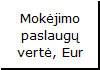 ir 

Valstybės kodas pagal ISO 3166-2 (Rezidavimas – nuolatinė buveinė / gyvenamoji vieta)
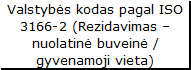 

galime juos panaudoti dvejuose mums aktualiuose skaičiavimuose:

1. Rezidentiškumo/Nerezidentiškumo santykiui apskaičiuoti (tikimasi, kad rezidentų dalis maža - nuo 5 iki 10 %)
2. Nerezidentų pasiskirstymą pagal šalis, kurį galime proporcingai pritaikyti **kredito** pusei skaičiuoti, panaudodami Pelno (Nuostolio) ataskaitos duomenis apie gautas pajamas

Importuojame ir apdirbame duomenis:

In [102]:
## Read data
EM0010_02_ <- readxl::read_excel("Ataskaitu+duomenu+lenteles (AML) nuo 2023-06-16_POPULATEDFAKEDATA.xlsx", sheet = 2, skip = 3) # Pavyzdinė lentelė su netikrais duomenimis

head(EM0010_02_)

Valstybės kodas pagal ISO 3166-2 (fizinių asmenų ir naudos gavėjų pilietybė),Klientų skaičius,"Mokėjimo paslaugų vertė, Eur",Kliento tipas (fizinis / juridinis) ir naudos gavėjai,PEP,Valstybės kodas pagal ISO 3166-2 (Rezidavimas – nuolatinė buveinė / gyvenamoji vieta)
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
AD,10,NA,Naudos gavėjas,Ne,NA
AD,45,NA,Naudos gavėjas,Ne,NA
AF,30,NA,Naudos gavėjas,Ne,NA
NA,25,632.3631,Juridinis,Ne,FI
NA,11,140.4553,Fizinis,Ne,FR
NA,1,123.1419,Juridinis,Ne,FR


In [103]:
#EM0010_02_new <- data.table::fread("data/EM0010_2023Q2.csv", sep = ",") # 2023-08-14
#EM0010_02_new <- data.table::fread("data/EM0010_2023Q2_20230814.csv", sep = ",") # 2023-08-14 - su ATTR_CODE stulpeliu

head(EM0010_02_new)

start_time <- Sys.time()
#AML_data <- data.table::fread("EM0010_clean.csv", sep = ";")
#AML_data <- data.table::fread("data/EM0010_2023-08-18.csv", sep = ",") # su RA_CODE stulpeliu
AML_data <- data.table::fread("data/EM0010_2023Q3_20231213.csv", sep = ",") # su RA_CODE stulpeliu

end_time <- Sys.time()

head(AML_data)

GROUP_ID,DATASET_ID,RA_ID,REP_DATE,STATE,LABEL,R_TEXT,R_DATE,R_NUMBER,NAME,OBJ_ID,ATTR_CODE,ATTR_ID
<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<int>,<chr>,<int>
EM0010,EM0010_02,61705753,6/30/2023,B,Patvirtinta,,NA,3,"UAB """"Glocash Payment""""",396422555,KL_SK,362917281
EM0010,EM0010_02,61705753,6/30/2023,B,Patvirtinta,,NA,5526051,"UAB """"Glocash Payment""""",396422555,MP_VRT,362917282
EM0010,EM0010_02,61705753,6/30/2023,B,Patvirtinta,JURIDINIS,NA,NA,"UAB """"Glocash Payment""""",396422555,KT_NG,362917283
EM0010,EM0010_02,61705753,6/30/2023,B,Patvirtinta,0,NA,NA,"UAB """"Glocash Payment""""",396422555,PEP,362917284
EM0010,EM0010_02,61705753,6/30/2023,B,Patvirtinta,GB,NA,NA,"UAB """"Glocash Payment""""",396422555,SALIS_VIET,362917285
EM0010,EM0010_02,61705753,6/30/2023,B,Patvirtinta,CN,NA,NA,"UAB """"Glocash Payment""""",396422556,SALIS_PILIET,362917280


R_TEXT,R_DATE,R_NUMBER,OBJ_ID,ATTR_ID,ATTR_ID.1,DATATYPE,VALID_FROM,VALID_TO,GROUP_ID,⋯,COMMENT_LB,VARIANT_ID,RA_ID,NAME,RA_CODE,VALID_FROM,VALID_TO,CREATION_DATE,UPDATE_DATE,NAME_S
<chr>,<lgl>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<lgl>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
,NA,10,424668365,362917281,362917281,NUMBER,1/1/2023,1/1/3000,EM0010,⋯,,NA,140224377,UAB Nandi Finance,305138937,3/31/2020,1/1/3000,4/15/2020 11:06:24 AM,12/13/2023 9:23:46 AM,Nandi Finance
,NA,55590979,424668365,362917282,362917282,NUMBER,1/1/2023,1/1/3000,EM0010,⋯,,NA,140224377,UAB Nandi Finance,305138937,3/31/2020,1/1/3000,4/15/2020 11:06:24 AM,12/13/2023 9:23:46 AM,Nandi Finance
JURIDINIS,NA,NA,424668365,362917283,362917283,TEXT,1/1/2023,1/1/3000,EM0010,⋯,,NA,140224377,UAB Nandi Finance,305138937,3/31/2020,1/1/3000,4/15/2020 11:06:24 AM,12/13/2023 9:23:46 AM,Nandi Finance
0,NA,NA,424668365,362917284,362917284,TEXT,1/1/2023,1/1/3000,EM0010,⋯,,NA,140224377,UAB Nandi Finance,305138937,3/31/2020,1/1/3000,4/15/2020 11:06:24 AM,12/13/2023 9:23:46 AM,Nandi Finance
NL,NA,NA,424668365,362917285,362917285,TEXT,1/1/2023,1/1/3000,EM0010,⋯,,NA,140224377,UAB Nandi Finance,305138937,3/31/2020,1/1/3000,4/15/2020 11:06:24 AM,12/13/2023 9:23:46 AM,Nandi Finance
,NA,3,424668366,362917281,362917281,NUMBER,1/1/2023,1/1/3000,EM0010,⋯,,NA,140224377,UAB Nandi Finance,305138937,3/31/2020,1/1/3000,4/15/2020 11:06:24 AM,12/13/2023 9:23:46 AM,Nandi Finance


# 2. Skaičiavimai
## 2.1. Kreditas (Eksportas)
Tam, kad apskaičiuotume kredito (eksporto) rodiklius, imame **EM008_03** lentelės duomenis. 
1. Skaičiuojame visų imties (**~100**) įmonių **Paslaugų ir komisinių pajamų** sumą tam laikotarpiui.
2. Panaudojame iŠ AML ataskaitos (lentelės **EM0010_2**) išskaičiuotą Nerezidentų daugiklį, kad apskaičiuome **Paslaugų ir komisinių pajamas**, tenkančias nerezidentams.
3. Panaudojame iš tos pačios AML ataskaitos lentelės gautą šalių pasiskirstymo daugiklį kiekvienai šaliai bei proporcingai paskirstome ir apskaičiuojame kiekvienai iš šalių **Paslaugų ir komisinių pajamų** rodiklį.

\begin{equation} \sum_{i=1}^{n}PKP_n = PKP_1 + PKP_2 + ... + PKP_n \end{equation}

\begin{equation} Rez_{ik} = \frac{MPV_{LT}} {\sum_{i=1}^{m}MPV} \end{equation}

$ PKP $ - Paslaugų ir komisinių pajamos

$ Rez_{ik} $ - Rezidentiškumo indeksas **kreditui**

$ \sum_{i=1}^{m}MPV $ - Mokėjimo paslaugų vertė, Eur

$ MPV_X $ - Mokėjimo paslaugų vertė, Eur, su šalimi X (EM0010_02 lentelės duomenys)

$ MPV_{LT} $ - Mokėjimo paslaugų vertė, Eur, Lietuvoje (EM0010_02 lentelės duomenys)

$ n $ - Įmonių (atrinktų) skaičius

$ m $ - Šalių skaičius

Skaičiavimų implementacija su R:

In [104]:
######################################
# Testinis variantas
######################################

####
# Rezidentų/ nerezidentų santykis
####

EM0010_02_PagalSali <- EM0010_02_ |> 
  dplyr::filter(`Kliento tipas (fizinis / juridinis) ir naudos gavėjai` != 
                  "Naudos gavėjas") |>
  dplyr::group_by(`Valstybės kodas pagal ISO 3166-2 (Rezidavimas – nuolatinė buveinė / gyvenamoji vieta)`) |>
  dplyr::summarize(Verte = sum(`Mokėjimo paslaugų vertė, Eur`))

Suma_verte <- sum(EM0010_02_$`Mokėjimo paslaugų vertė, Eur`, na.rm = TRUE)

Suma_LT_verte <- EM0010_02_ |> 
  dplyr::filter(`Kliento tipas (fizinis / juridinis) ir naudos gavėjai` != 
                                               "Naudos gavėjas",
                `Valstybės kodas pagal ISO 3166-2 (Rezidavimas – nuolatinė buveinė / gyvenamoji vieta)` == "LT")

Suma_LT_verte <- sum(Suma_LT_verte$`Mokėjimo paslaugų vertė, Eur`)

# Rezidentų
Suma_LT_verte / Suma_verte * 100

# Nerezidentų
(Suma_verte - Suma_LT_verte) / Suma_verte * 100

(Rez_ik <- Suma_LT_verte / Suma_verte)

head(EM0010_02_PagalSali)

[1] 54.95086

[1] 45.04914

[1] 0.5495086

Valstybės kodas pagal ISO 3166-2 (Rezidavimas – nuolatinė buveinė / gyvenamoji vieta),Verte
<chr>,<dbl>
FI,632.3631
FR,263.5973
GB,790.1132
GG,924.7604
GI,971.5068
GM,495.7081


In [105]:
# Nuskaitome AML duomenis, su ranka atrinktai stulpeliais (kad nesidubliuotų)
AML_data <- data.table::fread("data/AML_data_full_DB_01_20231214.csv", sep = ";") # su RA_CODE stulpeliu
head(AML_data)

R_TEXT,R_DATE,R_NUMBER,OBJ_ID,ATTR_ID,RA_ID,RA_CODE,REP_DATE,DATASET_ID,ATTR_CODE
<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
,,10,424668365,362917281,140224377,305138937,9/30/2023,EM0010_02,KL_SK
,,55590979,424668365,362917282,140224377,305138937,9/30/2023,EM0010_02,MP_VRT
JURIDINIS,,NA,424668365,362917283,140224377,305138937,9/30/2023,EM0010_02,KT_NG
0,,NA,424668365,362917284,140224377,305138937,9/30/2023,EM0010_02,PEP
NL,,NA,424668365,362917285,140224377,305138937,9/30/2023,EM0010_02,SALIS_VIET
,,3,424668366,362917281,140224377,305138937,9/30/2023,EM0010_02,KL_SK


In [106]:
###############################
# Implementacija su nauaja AML duomenų struktūra (2023-08-18)
###############################

full_DB_01 <- AML_data |> 
  dplyr::select(R_TEXT, R_DATE, R_NUMBER, OBJ_ID, ATTR_ID, RA_ID, 
                RA_CODE, #NAME, 
                REP_DATE, DATASET_ID, ATTR_CODE)

library(magrittr)
library(tidyverse)
library(data.table)

date_today <- Sys.Date() # Šiandienos data
write.csv(AML_data, paste0("output/AML_data", date_today, ".csv")) # Išsisaugome šios dienos AML duomenis

# Išmetame "NAUD_GAVEJAS"
DB_2M_4<- full_DB_01 %>% dplyr::filter(DATASET_ID == 'EM0010_02',
                                       R_TEXT != 'NAUD_GAVEJAS') # Po AML ataskaitos atnaujinimo

# Apibrėžiame filtravimo ir pasirinkimo funkcijas
funn0_2M_4<-function(i){DB_2M_4 %>% dplyr::filter(RA_CODE==i & ATTR_CODE=='MP_VRT' ) %>% dplyr::select(OBJ_ID, REP_DATE, R_NUMBER)}
funn1_2M_4<-function(i){DB_2M_4 %>% dplyr::filter(RA_CODE==i & ATTR_CODE=='KT_NG' ) %>% dplyr::select(OBJ_ID, REP_DATE, R_TEXT)}
funn2_2M_4<-function(i){DB_2M_4 %>% dplyr::filter(RA_CODE==i & ATTR_CODE=='SALIS_VIET' ) %>% dplyr::select(OBJ_ID, REP_DATE, R_TEXT)}

t0_2M_4<-rbindlist(lapply(unique(DB_2M_4$RA_CODE),funn0_2M_4))
t1_2M_4<-rbindlist(lapply(unique(DB_2M_4$RA_CODE),funn1_2M_4))
t2_2M_4<-rbindlist(lapply(unique(DB_2M_4$RA_CODE),funn2_2M_4))

head(t0_2M_4) # Vertė
head(t1_2M_4) # Kliento tipas
head(t2_2M_4) # Rezidavimo šalis


OBJ_ID,REP_DATE,R_NUMBER
<int>,<chr>,<int>
424668365,9/30/2023,55590979
424668366,9/30/2023,254573
425267766,9/30/2023,9194
425267765,9/30/2023,4310
425267767,9/30/2023,6
425267768,9/30/2023,6518


OBJ_ID,REP_DATE,R_TEXT
<int>,<chr>,<chr>
424668365,9/30/2023,JURIDINIS
424668366,9/30/2023,JURIDINIS
425267766,9/30/2023,FIZINIS
425267765,9/30/2023,FIZINIS
425267767,9/30/2023,FIZINIS
425267768,9/30/2023,FIZINIS


OBJ_ID,REP_DATE,R_TEXT
<int>,<chr>,<chr>
424668365,9/30/2023,NL
424668366,9/30/2023,NL
425267766,9/30/2023,ES
425267765,9/30/2023,CH
425267767,9/30/2023,GB
425267768,9/30/2023,MX


Toliau apjungiame gautas lenteles.

In [107]:
df_list_2M_4 <- list(t0_2M_4, t1_2M_4, t2_2M_4)#, t3_2M_4, t4_2M_4, t5_2M_4)
rez_2M_4_1<-""
rez_2M_4_1<-df_list_2M_4 %>% purrr::reduce(full_join, by='OBJ_ID')
head(rez_2M_4_1, 3)
#rez_2M_4_1 <- rez_2M_4_1 |> dplyr::select(OBJ_ID, REP_DATE.x, R_NUMBER.x, R_TEXT.x, R_TEXT.y)
rez_2M_4_1 <- rez_2M_4_1 |> dplyr::select(OBJ_ID, REP_DATE.x, R_NUMBER, R_TEXT.x, R_TEXT.y)

colnames(rez_2M_4_1)<-c('OBJ_ID',"REP_DATE", 'MP_VRT',"KT_NG", 'SALIS_VIET')

# Grupuojame skaičiavimų rezultatus
rez_2M_4_1 |> dplyr::group_by(SALIS_VIET, REP_DATE) |> dplyr::summarize(MokejimoPaslauguVerte = sum(MP_VRT)) # Sugrupuota pagal šalį ir laikotarpį - MUMS REIKIA TIK PASKUTINIO LAIKOTARPIO
rez_2M_4_1 |> dplyr::group_by(SALIS_VIET) |> dplyr::summarize(MokejimoPaslauguVerte = sum(MP_VRT)) # Sugrupuota pagal šalį  (visų laikotarpių suma) - NENAUDOTI

OBJ_ID,REP_DATE.x,R_NUMBER,REP_DATE.y,R_TEXT.x,REP_DATE,R_TEXT.y
<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
424668365,9/30/2023,55590979,9/30/2023,JURIDINIS,9/30/2023,NL
424668366,9/30/2023,254573,9/30/2023,JURIDINIS,9/30/2023,NL
425267766,9/30/2023,9194,9/30/2023,FIZINIS,9/30/2023,ES


`summarise()` has grouped output by 'SALIS_VIET'. You can override using the
`.groups` argument.


SALIS_VIET,REP_DATE,MokejimoPaslauguVerte
<chr>,<chr>,<dbl>
AD,9/30/2023,4823160
AE,9/30/2023,103846716
AF,9/30/2023,220
AG,9/30/2023,2502045
AI,9/30/2023,7892
AL,9/30/2023,20911
AM,9/30/2023,27002219
AN,9/30/2023,368198
AO,9/30/2023,136


SALIS_VIET,MokejimoPaslauguVerte
<chr>,<dbl>
AD,4823160
AE,103846716
AF,220
AG,2502045
AI,7892
AL,20911
AM,27002219
AN,368198
AO,136


## Nerezidentų indekso skaičiavimas

In [108]:
#AML_pasiskirstymas <- rez_2M_4_1 |> dplyr::filter(REP_DATE == "6/30/2023") |> dplyr::group_by(SALIS_VIET) |> 
#  dplyr::summarize(MokejimoPaslauguVerte = sum(MP_VRT)) |> 
#  dplyr::mutate(santykis = MokejimoPaslauguVerte / sum(MokejimoPaslauguVerte)) |> dplyr::arrange(desc(santykis))
#print(AML_pasiskirstymas)

AML_pasiskirstymas <- rez_2M_4_1 |> dplyr::filter(REP_DATE == "9/30/2023") |> dplyr::group_by(SALIS_VIET) |> 
  dplyr::summarize(MokejimoPaslauguVerte = sum(MP_VRT)) |> 
  dplyr::mutate(santykis = MokejimoPaslauguVerte / sum(MokejimoPaslauguVerte)) |> dplyr::arrange(desc(santykis))
print(AML_pasiskirstymas)

# A tibble: 207 × 3
   SALIS_VIET MokejimoPaslauguVerte santykis
   <chr>                      <dbl>    <dbl>
 1 LT                    5716277489   0.229 
 2 CY                    3936872685   0.157 
 3 GB                    2479398834   0.0991
 4 DK                    2228339503   0.0891
 5 PL                    1097746654   0.0439
 6 EE                    1073556731   0.0429
 7 MT                     926096093   0.0370
 8 HK                     708726220   0.0283
 9 LV                     600421222   0.0240
10 CA                     476726665   0.0191
# ℹ 197 more rows


In [109]:
# Nerezidentiškumo indeksas skaičiuojamas kaip 100 - LT_santykis
(Rez_ik <- (AML_pasiskirstymas |> dplyr::filter(SALIS_VIET == "LT"))$santykis)

print(Rez_ik)

[1] 0.2285103

[1] 0.2285103


Nerezidentų indeksą kaip daugiklį panaudosime Paslaugų ir komisinių pajamoms sutraukti.

\begin{equation} PKP_{nr} = PKP * (1-Rez_{ik}) \end{equation}

$PKP_{nr} $ -  Ne rezidentų Paslaugų ir komisinių pajamos

In [110]:
# Skaičiuojame pagal rezidentiškumo indeksą pakoreguotas pajamas (kredito pusė)
dfp_adj <- dfp |> dplyr::mutate(Suma_adj = sum(Suma * (1 - Rez_ik)))
(dfp_adj) # Srautų sumos (NEIMAME ŠIŲ SKAIČIŲ)

dfp2_adj <- dfp2 |> dplyr::mutate(Suma_adj = sum(Suma * (1 - Rez_ik)))
(dfp2_adj) # Srautai (MŪSŲ REZULTATAS)

REP_DATE,BSI_CODE,Suma,Suma_adj
<date>,<chr>,<int>,<dbl>
2021-12-31,I_II_PSLG_KOMIS_PAJ,190927,147298.22
2022-03-31,I_II_PSLG_KOMIS_PAJ,66200,51072.62
2022-06-30,I_II_PSLG_KOMIS_PAJ,150893,116412.40
2022-09-30,I_II_PSLG_KOMIS_PAJ,241650,186430.49
2022-12-31,I_II_PSLG_KOMIS_PAJ,308079,237679.78
2023-03-31,I_II_PSLG_KOMIS_PAJ,90924,70146.93
2023-06-30,I_II_PSLG_KOMIS_PAJ,180066,138919.07
2023-09-30,I_II_PSLG_KOMIS_PAJ,276510,213324.62


REP_DATE,BSI_CODE,Suma_stock,Suma,Suma_adj
<date>,<chr>,<dbl>,<int>,<dbl>
2021-12-31,I_II_PSLG_KOMIS_PAJ,190927,0,0.00
2022-03-31,I_II_PSLG_KOMIS_PAJ,66200,66200,51072.62
2022-06-30,I_II_PSLG_KOMIS_PAJ,150893,84693,65339.78
2022-09-30,I_II_PSLG_KOMIS_PAJ,241650,90757,70018.09
2022-12-31,I_II_PSLG_KOMIS_PAJ,308079,66429,51249.29
2023-03-31,I_II_PSLG_KOMIS_PAJ,90924,90924,70146.93
2023-06-30,I_II_PSLG_KOMIS_PAJ,180066,89142,68772.14
2023-09-30,I_II_PSLG_KOMIS_PAJ,276510,96444,74405.55


Šie skaičiavimai viršuje sudaugina visų praeities laikotarpių pajamų vertes iš einamojo laikotarpio rezidentiškumo indekso. Tad mums aktuali tik **paskutinio laikotarpio** vertė.

### 2.1.1. Pajamų išskaidymas pagal šalis, naudojant AML (**EM0010_02**) duomenis
Prisimename, kad 

$ \sum_{i=1}^{m}MPV $ - Mokėjimo paslaugų vertė, Eur

$ MPV_X $ - Mokėjimo paslaugų vertė, Eur, su šalimi X (**EM0010_02** lentelės duomenys)

$ PKP_{X} $ - Paslaugų ir komisinių pajamos, tenkančios šaliai X

Tai, konkrečios šalies pajamų dalį skaičiuojame tokiu būdu:

\begin{equation} PKP_{X} = PKP * \frac{MPV_X} {\sum_{i=1}^{m}MPV} \end{equation}

R kodo pagalba skaičiavimas atrodo šitaip:

In [111]:
# Bendras MVP
MVP <- EM0010_02_ |> 
  dplyr::filter(`Kliento tipas (fizinis / juridinis) ir naudos gavėjai` != 
                                               "Naudos gavėjas")

MVP <- sum(MVP$`Mokėjimo paslaugų vertė, Eur`)

# MVP tekęs Didžiajai Britanijai
MVP_GB <- EM0010_02_ |> 
  dplyr::filter(`Kliento tipas (fizinis / juridinis) ir naudos gavėjai` != 
                                               "Naudos gavėjas",
                `Valstybės kodas pagal ISO 3166-2 (Rezidavimas – nuolatinė buveinė / gyvenamoji vieta)` == "GB")

MVP_GB <- sum(MVP_GB$`Mokėjimo paslaugų vertė, Eur`)

(PKP_GB = dfp_adj$Suma_adj * (MVP_GB / MVP))
PKP_GB = dfp2_adj$Suma_adj * (MVP_GB / MVP)

PKP_GB # visi praėję laikotarpiai - Britanija

[1] 3806.730 1319.905 3008.526 4818.052 6142.523 1812.856 3590.182 5513.096

[1]    0.000 1319.905 1688.621 1809.526 1324.471 1812.856 1777.326 1922.914

In [112]:
#AML_pasiskirstymas |> dplyr::mutate(MPV_sum = sum(MokejimoPaslauguVerte))
AML_pasiskirstymas_beLT <- AML_pasiskirstymas[-c(1), ]
AML_pasiskirstymas_beLT <- AML_pasiskirstymas_beLT |> dplyr::mutate(santykis = MokejimoPaslauguVerte / sum(MokejimoPaslauguVerte),
                                                                   MPV_sum = sum(MokejimoPaslauguVerte))
head(AML_pasiskirstymas)
head(AML_pasiskirstymas_beLT)

SALIS_VIET,MokejimoPaslauguVerte,santykis
<chr>,<dbl>,<dbl>
LT,5716277489,0.22851028
CY,3936872685,0.15737792
GB,2479398834,0.09911487
DK,2228339503,0.08907869
PL,1097746654,0.04388282
EE,1073556731,0.04291582


SALIS_VIET,MokejimoPaslauguVerte,santykis,MPV_sum
<chr>,<dbl>,<dbl>,<dbl>
CY,3936872685,0.20399225,19299128764
GB,2479398834,0.12847206,19299128764
DK,2228339503,0.11546322,19299128764
PL,1097746654,0.05688063,19299128764
EE,1073556731,0.05562721,19299128764
MT,926096093,0.04798642,19299128764


In [113]:
# MVP tekęs Prancūzijai
MVP_FR <- EM0010_02_ |> 
  dplyr::filter(`Kliento tipas (fizinis / juridinis) ir naudos gavėjai` != 
                                               "Naudos gavėjas",
                `Valstybės kodas pagal ISO 3166-2 (Rezidavimas – nuolatinė buveinė / gyvenamoji vieta)` == "FR")

MVP_FR <- sum(MVP_FR$`Mokėjimo paslaugų vertė, Eur`)

(PKP_FR = dfp_adj$Suma_adj * (MVP_FR / MVP))
PKP_FR = dfp2_adj$Suma_adj * (MVP_FR / MVP)

PKP_FR # visi praėję laikotarpiai - Prancūzija

[1] 1269.9999  440.3463 1003.7034 1607.3969 2049.2664  604.8043 1197.7551
[8] 1839.2771

[1]   0.0000 440.3463 563.3572 603.6934 441.8695 604.8043 592.9509 641.5220

Grupavimo pagalba apskaičiuojame **Paslaugų ir komisinių pajamų** pasiskirstymą visoms šalims: 

In [114]:
EM0010_02_PagalSali <- EM0010_02_ |> 
  dplyr::filter(`Kliento tipas (fizinis / juridinis) ir naudos gavėjai` != 
                  "Naudos gavėjas") |>
  dplyr::group_by(`Valstybės kodas pagal ISO 3166-2 (Rezidavimas – nuolatinė buveinė / gyvenamoji vieta)`) |>
  dplyr::summarize(Verte = sum(`Mokėjimo paslaugų vertė, Eur`))

# Atmetame Lietuvos dalį, tam kad apskaičiuotume tik nerezidentų pasiskirstymą
EM0010_02_PagalSali_nr <- EM0010_02_PagalSali |> 
  dplyr::filter(`Valstybės kodas pagal ISO 3166-2 (Rezidavimas – nuolatinė buveinė / gyvenamoji vieta)` != "LT")

# Nerezidentų pasiskirstymas
EM0010_02_PagalSali_nr <- EM0010_02_PagalSali_nr |> 
  dplyr::mutate(MPV_dalis = Verte / sum(Verte))

head(EM0010_02_PagalSali_nr)

Valstybės kodas pagal ISO 3166-2 (Rezidavimas – nuolatinė buveinė / gyvenamoji vieta),Verte,MPV_dalis
<chr>,<dbl>,<dbl>
FI,632.3631,0.04591402
FR,263.5973,0.01913902
GB,790.1132,0.05736779
GG,924.7604,0.06714413
GI,971.5068,0.07053824
GM,495.7081,0.03599191


In [115]:
head(AML_pasiskirstymas_beLT)

SALIS_VIET,MokejimoPaslauguVerte,santykis,MPV_sum
<chr>,<dbl>,<dbl>,<dbl>
CY,3936872685,0.20399225,19299128764
GB,2479398834,0.12847206,19299128764
DK,2228339503,0.11546322,19299128764
PL,1097746654,0.05688063,19299128764
EE,1073556731,0.05562721,19299128764
MT,926096093,0.04798642,19299128764


Iš šio MPV dalies pasiskirstymo pagaliau galime apskaičiuoti PKP pasiskirstymą kiekvienai šaliai.

In [116]:
### Skaičiuojame PKP dalį kiekvienai šaliai

# Išjungiame "Scientific notation" (tam, kad gautume grynus skaičius, o ne tokio formato 4.506958e-05 trumpinius.
options(scipen=999)

# Pirmiausia išsifiltruojame naujausio laikotarpio PKP rodiklį
#PKP_t0 <- (dfp2_adj |> dplyr::filter(REP_DATE == "2022-12-31"))$Suma_adj
#PKP_t0 <- (dfp2_adj |> dplyr::filter(REP_DATE == "2023-06-30"))$Suma_adj # Adjusted (apskaičiuotas, išmetus LT dalį)
PKP_t0 <- (dfp2_adj |> dplyr::filter(REP_DATE == "2023-09-30"))$Suma_adj # Adjusted (apskaičiuotas, išmetus LT dalį)
PKP_t0

# Dabar galime panaudoti naujausio laikotarpio PKP vertę, kad apskaičiuotume PKP pasiskirstymą pagal šalis (panaudodami AML duomenų operacijų pasiskirstymo duomenis)
#EM0010_02_PagalSali_nr |> dplyr::mutate(PKP_dalis = MPV_dalis * PKP_t0)
AML_pasiskirstymas_beLT <- AML_pasiskirstymas_beLT |> dplyr::mutate(
    PKP_t0_sum = PKP_t0,
    PKP_dalis = santykis * PKP_t0) # (čia "santykis" atitinka MPD_dalis)
head(AML_pasiskirstymas_beLT)
tail(AML_pasiskirstymas_beLT)

[1] 74405.55

SALIS_VIET,MokejimoPaslauguVerte,santykis,MPV_sum,PKP_t0_sum,PKP_dalis
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CY,3936872685,0.20399225,19299128764,74405.55,15178.156
GB,2479398834,0.12847206,19299128764,74405.55,9559.035
DK,2228339503,0.11546322,19299128764,74405.55,8591.105
PL,1097746654,0.05688063,19299128764,74405.55,4232.235
EE,1073556731,0.05562721,19299128764,74405.55,4138.974
MT,926096093,0.04798642,19299128764,74405.55,3570.456


SALIS_VIET,MokejimoPaslauguVerte,santykis,MPV_sum,PKP_t0_sum,PKP_dalis
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
VA,16,0.0000000008290530,19299128764,74405.55,0.000061686146
BV,15,0.0000000007772372,19299128764,74405.55,0.000057830762
TZ,10,0.0000000005181581,19299128764,74405.55,0.000038553841
GA,6,0.0000000003108949,19299128764,74405.55,0.000023132305
GL,5,0.0000000002590791,19299128764,74405.55,0.000019276921
MS,2,0.0000000001036316,19299128764,74405.55,0.000007710768


Išsugome skaičiavimų rezultatus. Mus domina paskutinis stulpelis "PKP_dalis" - **Paslaugų ir komisinių pajamų** pasiskirstymas pagal šalis (be Lietuvos).

In [117]:
# Įrašome rezultatus į Excel failą
data <- Sys.Date()
writexl::write_xlsx(AML_pasiskirstymas_beLT, paste0("output/KREDITAS_PKP_pasiskirstymas_", data, ".xlsx"))

## 2.2. Debetas (Importas)
Debeto pusei apskaičiuoti negalime naudoti AML ataskaitos (**EM0010_2** lentelės) duomenų apie rezidavimo šalis, kadangi ten naudojamas pasiskirstymas atitinka pajamų pusę. Tam, kad apskaičiuotume sąnaudų pusę, panaudosime EPĮ apklausos duomenis (debetą), bei ten randamą šalių pasiskirstymą. Tam, kad gautume rezidentiškumo/nerezidentiškumo koeficientą, palyginsime EPĮ tyrimo imties įmonių (30 aktyvių įmonių) sąnaudas su Finansinės atskaitomybės duomenyse pateikiamais tų pačių 30 įmonių sąnaudų duomenimis. Išvesime daugkartinį (pastovų) rezidentiškumo/nerezidentiškumo koeficientą, kurį naudosime pastoviai (iki rinkoje atsirastų reikšmingų pokyčių, dėl kurių reiktų peržiūrėti šią metodiką).
Skaičiavimo logika tokia:
1. Iš EPĮ apklausos duomenų apskaičiuojame 30 aktyvių (2022 Q4) įmonių paslaugų ir komisinių sąnaudas (debetą).
2. Iš PnL (**EM008_3** lentelės) ataskaitos duomenų, naudodami tų pačių 30 atrinktų įmonių duomenis, apskaičiuojame paslaugų ir komisinių sąnaudas.
3. EPĮ duomenyse turime sąnaudas susijusias **tik su nerezidentais**, tuo tarpu iš PnL duomenų apskaičiuojame sąnaudas, susijusias **tiek su rezidentais, tiek su nerezidentais**. 

\begin{equation} NRez_{id} = \frac{PKS_{EPĮ}} {PKS_{PnL}} \end{equation}

Čia:

$ PKS $ - Paslaugų ir komisinių sąnaudos

$ PKS_{EPĮ} $ - Paslaugų ir komisinių sąnaudos iš EPĮ tyrimo duomenų (n = 30 įmonių)

$ PKS_{PnL} $ - Paslaugų ir komisinių sąnaudos iš Pelno (Nuostolio) ataskaitų duomenų (n = 30 įmonių)

$ NRez_{id} $ - Nerezidentiškumo indeksas **debetui**

In [118]:
#head(df_debit)
#head(df_debit_og)

# Apskaičiuojame Paslaugų ir komisinių sąnaudas iš EPĮ tyrimo duomenų (n=30) (Nerezidentai)
PKS_epi <- sum(df_debit_og$`20224`)
#PKS_epi

# Apskaičiuojame Paslaugų ir komisinių sąnaudas iš Pelno (Nuostolio) ataskaitų 
PKS_pnl <- (dfs |> dplyr::filter(REP_DATE == "2022-12-31"))$Suma
PKS_pnl <- (dfs2 |> dplyr::filter(REP_DATE == "2022-12-31"))$Suma # Pilni duomenys (dar be 2023Q1) # NEKEIČIAME LAIKOTARPIO - pastoviai naudojame tą patį laikotarpį, kol neatsiras reikšmingų pokyčių rinkoje
PKS_pnl <- (dfs2_debit |> dplyr::filter(REP_DATE == "2022-12-31"))$Suma
class(PKS_pnl)
PKS_pnl

# Apskaičiuojame rezidentiškumo indeksą debeto pusei
NRez_id <- PKS_epi / PKS_pnl
NRez_id # Su nepilnais PnL duomenimis koeficientas gaunasi gerokai per didelis (realiai turi būti tarp 0 ir 1) | Naudojant pilnus duomenis (dfs2) NRez_id gauname ~0.2767

[1] "integer"

[1] 54993

[1] 0.6667374

Tikimasi rezidentikšumo indekso, kuris rodytų paslaugas su užsienio šalimis nuo 5 iki 10 proc., arba kiek daugiau. 56% yra per didelis skaičius.

In [119]:
tail(dfs2)
tail(dfs2_debit)
PKS_epi
PKS_pnl
(PKS_pnl - PKS_epi) / PKS_pnl # Rezidentiškumo indeksas (jei jo prireiktų vietoje Nerezidentiškumo indekso)

REP_DATE,BSI_CODE,Suma_stock,Suma
<date>,<chr>,<dbl>,<int>
2022-06-30,V_II_PSLG_KOMIS_SAN,80091,41415
2022-09-30,V_II_PSLG_KOMIS_SAN,134630,54539
2022-12-31,V_II_PSLG_KOMIS_SAN,189623,54993
2023-03-31,V_II_PSLG_KOMIS_SAN,52463,52463
2023-06-30,V_II_PSLG_KOMIS_SAN,98891,46428
2023-09-30,V_II_PSLG_KOMIS_SAN,152656,53765


REP_DATE,BSI_CODE,Suma_stock,Suma
<date>,<chr>,<dbl>,<int>
2022-06-30,V_II_PSLG_KOMIS_SAN,80091,41415
2022-09-30,V_II_PSLG_KOMIS_SAN,134630,54539
2022-12-31,V_II_PSLG_KOMIS_SAN,189623,54993
2023-03-31,V_II_PSLG_KOMIS_SAN,52463,52463
2023-06-30,V_II_PSLG_KOMIS_SAN,98891,46428
2023-09-30,V_II_PSLG_KOMIS_SAN,152656,53765


[1] 36665.89

[1] 54993

[1] 0.3332626

Turėdami Nerezidentiškumo indeksą sąnaudoms (debetui), galime gauti nerezidentams tenkančią Paslaugų ir komisinių sąnaudų dalį.

\begin{equation} PKS_{nr} = PKS_{PnL} * NRez_{id} \end{equation}, čia

$ PKS_{nr} $ - Paslaugų ir komisinių sąnaudos, tenkančios nerezidentams

$ PKS_{PnL} $ - Paslaugų ir komisinių sąnaudos (visos) iš Pelno ir Nuostolio ataskaitos (**EM008_03** lentelės)

$ NRez_{id} $ - Nerezidentiškumo indeksas debeto pusei

In [120]:
# Apskaičiuokime pagal nerezidentiškumo indeksą pakoreguotą sąnaudų sumos stulpelį
dfs_adj <- dfs |> dplyr::mutate(Suma_adj = Suma * NRez_id)
dfs_adj

# -//- su naujais (2023-05-24) duomenimis
dfs2_adj <- dfs2 |> dplyr::mutate(Suma_adj = Suma * NRez_id)
dfs2_adj # imame paskutinio laikotarpio vertę iš stulpelio Suma_adj

##### Šių debito pusės (sąnaudų) duomenų nenaudojame, nes jie buvo naudojami Nerezidentiškumo indeksui apskaičiuoti (EMĮ_deb/EM008_03_sąn)
#dfs2_debit_adj <- dfs2_debit |> dplyr::mutate(Suma_adj = Suma * NRez_id)
#dfs2_debit_adj

REP_DATE,BSI_CODE,Suma,Suma_adj
<date>,<chr>,<int>,<dbl>
2021-12-31,V_II_PSLG_KOMIS_SAN,99349,66239.69
2022-03-31,V_II_PSLG_KOMIS_SAN,38676,25786.74
2022-06-30,V_II_PSLG_KOMIS_SAN,80091,53399.67
2022-09-30,V_II_PSLG_KOMIS_SAN,134630,89762.86
2022-12-31,V_II_PSLG_KOMIS_SAN,189623,126428.75
2023-03-31,V_II_PSLG_KOMIS_SAN,52463,34979.04
2023-06-30,V_II_PSLG_KOMIS_SAN,98891,65934.33
2023-09-30,V_II_PSLG_KOMIS_SAN,152656,101781.47


REP_DATE,BSI_CODE,Suma_stock,Suma,Suma_adj
<date>,<chr>,<dbl>,<int>,<dbl>
2021-12-31,V_II_PSLG_KOMIS_SAN,99349,0,0.00
2022-03-31,V_II_PSLG_KOMIS_SAN,38676,38676,25786.74
2022-06-30,V_II_PSLG_KOMIS_SAN,80091,41415,27612.93
2022-09-30,V_II_PSLG_KOMIS_SAN,134630,54539,36363.19
2022-12-31,V_II_PSLG_KOMIS_SAN,189623,54993,36665.89
2023-03-31,V_II_PSLG_KOMIS_SAN,52463,52463,34979.04
2023-06-30,V_II_PSLG_KOMIS_SAN,98891,46428,30955.28
2023-09-30,V_II_PSLG_KOMIS_SAN,152656,53765,35847.14


Paslaugų ir komisinių sąnaudų išdalinimą šalims atliksime tokiu būdu:
1. Imsime EPĮ tęstinės apklausos (tyrimo) duomenis už 2022Q4 laikotarpį, bei ten esantį šalių pasiskirstymą debeto pusėje.
2. Apskaičiuosime santykinius šalių dydžius.
3. Sudauginsime kiekvienos šalies santykinį dydį su Paslaugų ir komisinių sąnaudų, tenkančių nerezidentams, dydžiu.

\begin{equation} \sum_{i=1}^{m}D = D_1 + D_2 + ... + D_m \end{equation}

\begin{equation} d_{X} = \frac{D_{X}}{\sum_{i=1}^{m}D} \end{equation}

\begin{equation} PKS_{X} = D_{X} * PKS_{nr} \end{equation}

čia

$ PKS_{X} $ - Paslaugų ir komisinių sąnaudos, tenkančios šaliai X

$ D_{X} $ - Debetas, tenkantis šaliai X

$ d_{X} $ - Debeto dalis, tenkanti šaliai X

$ m $ - šalių skaičius

R kodo pagalba apskaičiuokime atskiroms šalims tenkantį Paslaugų ir komisinių sąnaudų pasiskirstymą:

In [121]:
dfs_adj |> dplyr::filter(REP_DATE == "2022-12-31")
dfs2_adj |> dplyr::filter(REP_DATE == "2022-12-31")
dfs2_adj |> dplyr::filter(REP_DATE == "2023-06-30")
dfs2_adj |> dplyr::filter(REP_DATE == "2023-09-30")

# Suma_adj - Sąnaudų už komisinių ir paslaugų sumą, padauginta iš Nerezidentiškumo indekso
(PKS_nr <- (dfs_adj |> dplyr::filter(REP_DATE == "2022-12-31"))$Suma_adj)
(PKS_nr2 <- (dfs2_adj |> dplyr::filter(REP_DATE == "2022-12-31"))$Suma_adj) # Nauji duomenys (2023-05-24)
(PKS_nr2 <- (dfs2_adj |> dplyr::filter(REP_DATE == "2023-06-30"))$Suma_adj) # Nauji duomenys (2023-08-22) 


#df_debit_og |> dplyr::select(vardas, `20224`) |> dplyr::arrange(desc(`20224`)) |> dplyr::mutate(`20224_share` = `20224` / sum(`20224`),
#                                                                                               PKS_shared = `20224_share` * PKS_nr )
(df_debit_result <- df_debit_og |> dplyr::select(vardas, `20224`) |> dplyr::arrange(desc(`20224`)) |> dplyr::mutate(`20224_share` = `20224` / sum(`20224`),
                                                                                               PKS_shared = `20224_share` * PKS_nr2 ))
(df_debit_result <- df_debit_og |> dplyr::select('ŠALIS', `20224`) |> dplyr::arrange(desc(`20224`)) |> dplyr::mutate(`20224_share` = `20224` / sum(`20224`),
                                                                                               PKS_shared = `20224_share` * PKS_nr2 ))

class(PKS_nr)
class(PKS_nr2)

REP_DATE,BSI_CODE,Suma,Suma_adj
<date>,<chr>,<int>,<dbl>
2022-12-31,V_II_PSLG_KOMIS_SAN,189623,126428.7


REP_DATE,BSI_CODE,Suma_stock,Suma,Suma_adj
<date>,<chr>,<dbl>,<int>,<dbl>
2022-12-31,V_II_PSLG_KOMIS_SAN,189623,54993,36665.89


REP_DATE,BSI_CODE,Suma_stock,Suma,Suma_adj
<date>,<chr>,<dbl>,<int>,<dbl>
2023-06-30,V_II_PSLG_KOMIS_SAN,98891,46428,30955.28


REP_DATE,BSI_CODE,Suma_stock,Suma,Suma_adj
<date>,<chr>,<dbl>,<int>,<dbl>
2023-09-30,V_II_PSLG_KOMIS_SAN,152656,53765,35847.14


[1] 126428.7

[1] 36665.89

[1] 30955.28

vardas,20224,20224_share,PKS_shared
<chr>,<dbl>,<dbl>,<dbl>
Jungtinė Karalystė,16146.3596,0.440364587,13631.61096
Nyderlandai,2867.5487,0.078207530,2420.93631
Belgija,2711.5647,0.073953330,2289.24635
Prancūzija,2379.5894,0.064899267,2008.97526
Italija,1481.6680,0.040409983,1250.90250
Ispanija,1430.3449,0.039010232,1207.57283
Vokietija,1071.4181,0.029221114,904.54789
Lenkija,989.1265,0.026976748,835.07290
Kipras,710.3662,0.019374035,599.72875


ŠALIS,20224,20224_share,PKS_shared
<chr>,<dbl>,<dbl>,<dbl>
GB,16146.3596,0.440364587,13631.61096
NL,2867.5487,0.078207530,2420.93631
BE,2711.5647,0.073953330,2289.24635
FR,2379.5894,0.064899267,2008.97526
IT,1481.6680,0.040409983,1250.90250
ES,1430.3449,0.039010232,1207.57283
DE,1071.4181,0.029221114,904.54789
PL,989.1265,0.026976748,835.07290
CY,710.3662,0.019374035,599.72875


[1] "numeric"

[1] "numeric"

### Debeto paskirstymas pagal šalis
Išskaidome paskutinio laikotarpio debeto pusės vertę (**Paslaugų ir komisinių sąnaudas**) pagal EPĮ/MĮ apklausos duomenų 2022Q4 debeto pasiskirstymą tarp užsienio šalių.

# 3. Rezultatai
## PKP pagal šalis (pajamos/eksportas)

In [122]:
#EM0010_02_PagalSali_nr |> dplyr::mutate(PKP_dalis = MPV_dalis * PKP_t0)
print(AML_pasiskirstymas_beLT)
data <- Sys.Date()
writexl::write_xlsx(AML_pasiskirstymas_beLT, paste0("output/KREDITAS_PKP_pasiskirstymas_", data, ".xlsx"))

# A tibble: 206 × 6
   SALIS_VIET MokejimoPaslauguVerte santykis     MPV_sum PKP_t0_sum PKP_dalis
   <chr>                      <dbl>    <dbl>       <dbl>      <dbl>     <dbl>
 1 CY                    3936872685   0.204  19299128764     74406.    15178.
 2 GB                    2479398834   0.128  19299128764     74406.     9559.
 3 DK                    2228339503   0.115  19299128764     74406.     8591.
 4 PL                    1097746654   0.0569 19299128764     74406.     4232.
 5 EE                    1073556731   0.0556 19299128764     74406.     4139.
 6 MT                     926096093   0.0480 19299128764     74406.     3570.
 7 HK                     708726220   0.0367 19299128764     74406.     2732.
 8 LV                     600421222   0.0311 19299128764     74406.     2315.
 9 CA                     476726665   0.0247 19299128764     74406.     1838.
10 DE                     363000142   0.0188 19299128764     74406.     1400.
# ℹ 196 more rows


In [123]:
##############
# Kredito pusė
##############

Credit_side <- data.table::data.table()
Credit_side$SALIS <- AML_pasiskirstymas_beLT$SALIS_VIET
Credit_side$SUMA <- AML_pasiskirstymas_beLT$PKP_dalis

Credit_side_df <- as.data.frame(Credit_side) |> 
    dplyr::mutate(METAI = 2023, # Nurodyti metus
                  KETVIRTIS = 3, # Nurodyti ketvirtį
                  "MB KODAS" = "SG1",
                  "DUOMENU TIPAS" = "C",
                  VALIUTA = "EUR",
                  ImoniuKiekis = NULL)
head(Credit_side_df)

,SALIS,SUMA,METAI,KETVIRTIS,MB KODAS,DUOMENU TIPAS,VALIUTA
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,CY,15178.156,2023,3,SG1,C,EUR
2,GB,9559.035,2023,3,SG1,C,EUR
3,DK,8591.105,2023,3,SG1,C,EUR
4,PL,4232.235,2023,3,SG1,C,EUR
5,EE,4138.974,2023,3,SG1,C,EUR
6,MT,3570.456,2023,3,SG1,C,EUR


## PKS pagal šalis (sąnaudos/importas)

In [124]:
#df_debit_og |> dplyr::select(vardas, `20224`) |> dplyr::arrange(desc(`20224`)) |> dplyr::mutate(`20224_share` = `20224` / sum(`20224`),
#                                                                                               PKS_shared = `20224_share` * PKS_nr2 )

print(df_debit_result)
data <- Sys.Date()
writexl::write_xlsx(df_debit_result, paste0("output/DEBETAS_PKS_pasiskirstymas_", data, ".xlsx"))

# A tibble: 194 × 4
   ŠALIS `20224` `20224_share` PKS_shared
   <chr>   <dbl>         <dbl>      <dbl>
 1 GB     16146.        0.440      13632.
 2 NL      2868.        0.0782      2421.
 3 BE      2712.        0.0740      2289.
 4 FR      2380.        0.0649      2009.
 5 IT      1482.        0.0404      1251.
 6 ES      1430.        0.0390      1208.
 7 DE      1071.        0.0292       905.
 8 PL       989.        0.0270       835.
 9 CY       710.        0.0194       600.
10 GI       656.        0.0179       554.
# ℹ 184 more rows


In [125]:
######
# Debeto pusė
######

Debit_side <- data.table::data.table()
Debit_side$SALIS <- df_debit_result$`ŠALIS`
Debit_side$SUMA <- df_debit_result$PKS_shared

Debit_side_df <- as.data.frame(Debit_side) |> 
    dplyr::mutate(METAI = 2023, # Nurodyti metus
                  KETVIRTIS = 3, # Nurodyti ketvirtį
                  "MB KODAS" = "SG1",
                  "DUOMENU TIPAS" = "D",
                  VALIUTA = "EUR",
                  ImoniuKiekis = NULL)
head(Debit_side_df, 12)

,SALIS,SUMA,METAI,KETVIRTIS,MB KODAS,DUOMENU TIPAS,VALIUTA
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,GB,13631.6110,2023,3,SG1,D,EUR
2,NL,2420.9363,2023,3,SG1,D,EUR
3,BE,2289.2463,2023,3,SG1,D,EUR
4,FR,2008.9753,2023,3,SG1,D,EUR
5,IT,1250.9025,2023,3,SG1,D,EUR
6,ES,1207.5728,2023,3,SG1,D,EUR
7,DE,904.5479,2023,3,SG1,D,EUR
8,PL,835.0729,2023,3,SG1,D,EUR
9,CY,599.7287,2023,3,SG1,D,EUR


In [126]:
sum(Credit_side_df$SUMA)
sum(Debit_side_df$SUMA)

[1] 74405.55

[1] 30955.28

Išsaugome rezultatus reikiamu formatu:

In [127]:
datetime <- Sys.Date()
#writexl::write_xlsx(Credit_approx, paste0("output\\Credit2_", datetime, ".xlsx"))
#writexl::write_xlsx(Debit_approx, paste0("output\\Debit2_", datetime, ".xlsx"))

writexl::write_xlsx(Credit_side_df, paste0("output\\EPI_Credit_", datetime, ".xlsx"))
writexl::write_xlsx(Debit_side_df, paste0("output\\EPI_Debit_", datetime, ".xlsx"))

# 5. Metodologinės pastabos
1. PnL duomenys renkami **augimo principu**. Reikės rankinio apdirbimo. + **atliepta**
2. Pelno/Nuostolio ataskaitų duomenys bus peržiūrėti (patvirtinti) 2023 m. gegužės viduryje. (kol kas turime nepilnus duomenis) + **atliepta**
3. AML duomenys su nauja struktūra bus prieinami 2023 m. birželį. Duombazėje - nuguls. - **laukiama tolimesniam vystymui**
4. Įmonių imtis - peržiūrėti. + **atliepta**
5. Debeto pusei - imame ne vieno paskutinio laikotarpio šalis, o paskutinių 4 ketvirčių vidurkius. + **atliepta**
6. Klausimas dėl PnL duomenų - ar tikslinimas/tvirtinimas vyksta po kiekvieno ketvirčio? Kaip atrodo laiko juosta? ~ **28 dienos + 20 darbo dienų**